# Plot SpecParam Results
Plot schematic of LFP spectral parameterization results (exponent, r-squared, and stimulus-evoked changes in these parameters) 

#### Set path

In [1]:
# Define paths
REPO_PATH = r"C:\Users\Andre\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'


#### Imports

In [2]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import odml
import os

# custom
import sys
sys.path.append(REPO_PATH)
from scripts.plots import plot_schematic

#### Settings

In [3]:
# Session of interest (will ultimately apply to all sessions)
SESSIONS = ["A_SNR_041018", "L_SNR_250717"]
SESSION = "A_SNR_041018"

#### Functions

### Demo plotting function on arbitrary data

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.


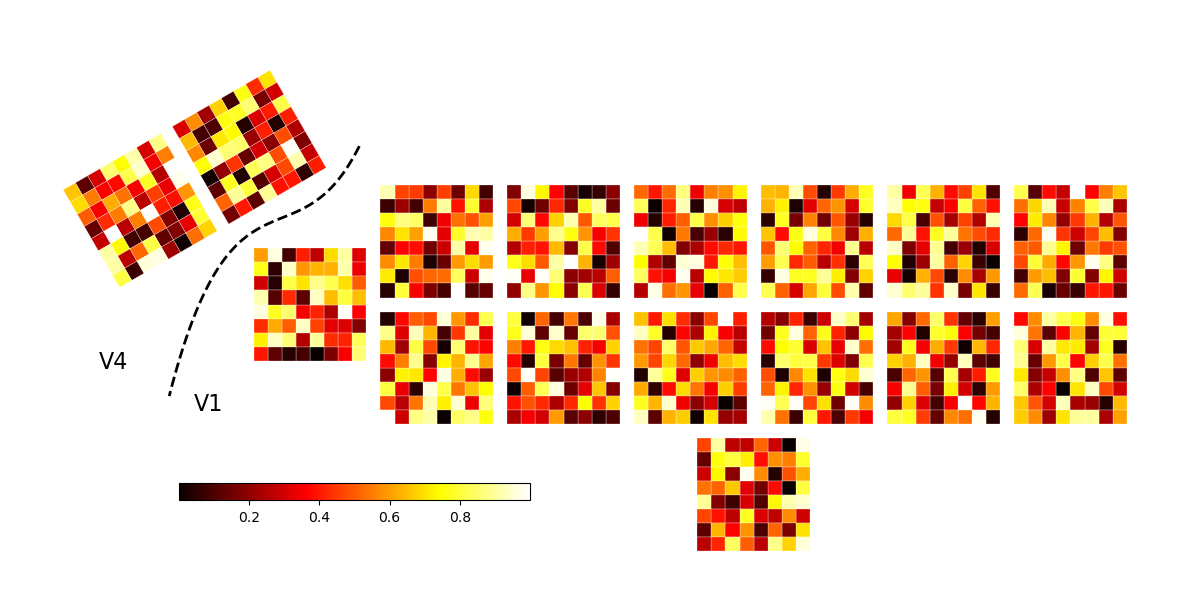

In [4]:
# define odml file path (contains metadata including electrode positions)
odml_path = fr"{PROJECT_PATH}\data\dataset\{SESSION}\metadata_{SESSION}.odml"

# TEMP - upload to G: Drive, then use line above to set odml_path
#odml_path = r"C:\Users\micha\datasets\V1_v4_1024_electrode_resting_state_data\data\A_SNR_041018\metadata_A_SNR_041018.odml" 

# define arbitrary data
data = np.random.rand(1024)

# plot
fig, ax = plot_schematic(data, odml_path)

### Main

##### create directory for figures

In [5]:
dir_figs = f"{PROJECT_PATH}/figures/params_schematic"
if not os.path.exists(dir_figs):
    os.makedirs(dir_figs)

##### load data (DataFrame of SpecParam results)

In [6]:
df_allsessions = pd.read_csv(fr"{PROJECT_PATH}\data\results\allsessions_params_df.csv")


##### Plot schematic of exponent results
3 plots: pre-stimulus exponent, post-stimulus exponent, and change in exponent

In [7]:
# setting limits for colorbar
limits = np.append(df_allsessions['pre_exp'],df_allsessions['post_exp'])
maxlim = max(limits)
minlim = min(limits)


warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element 

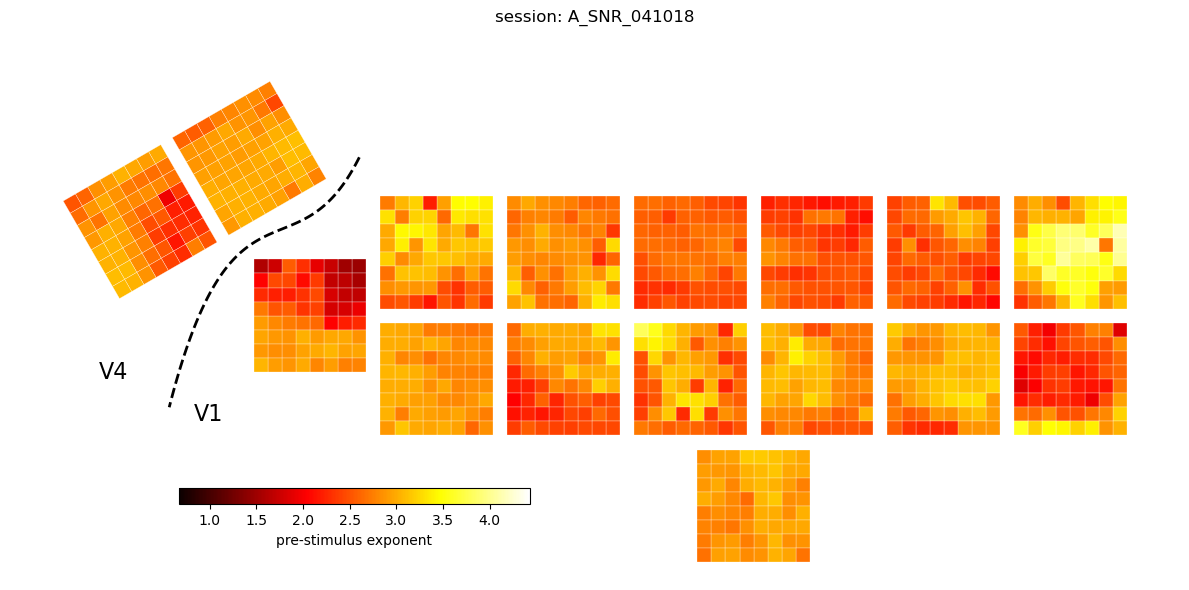

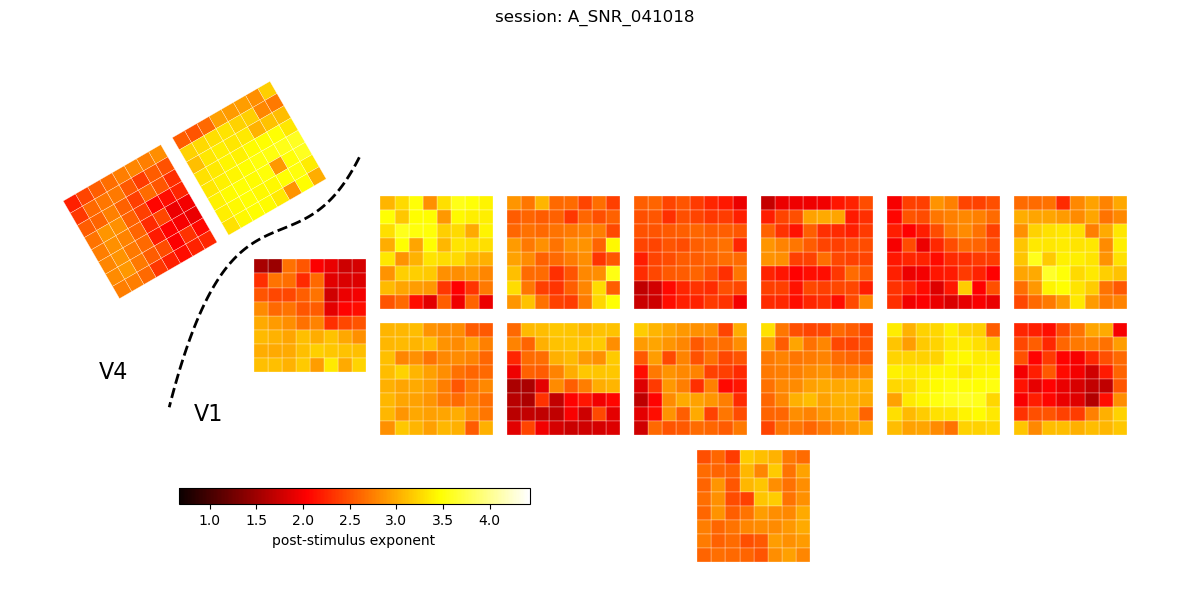

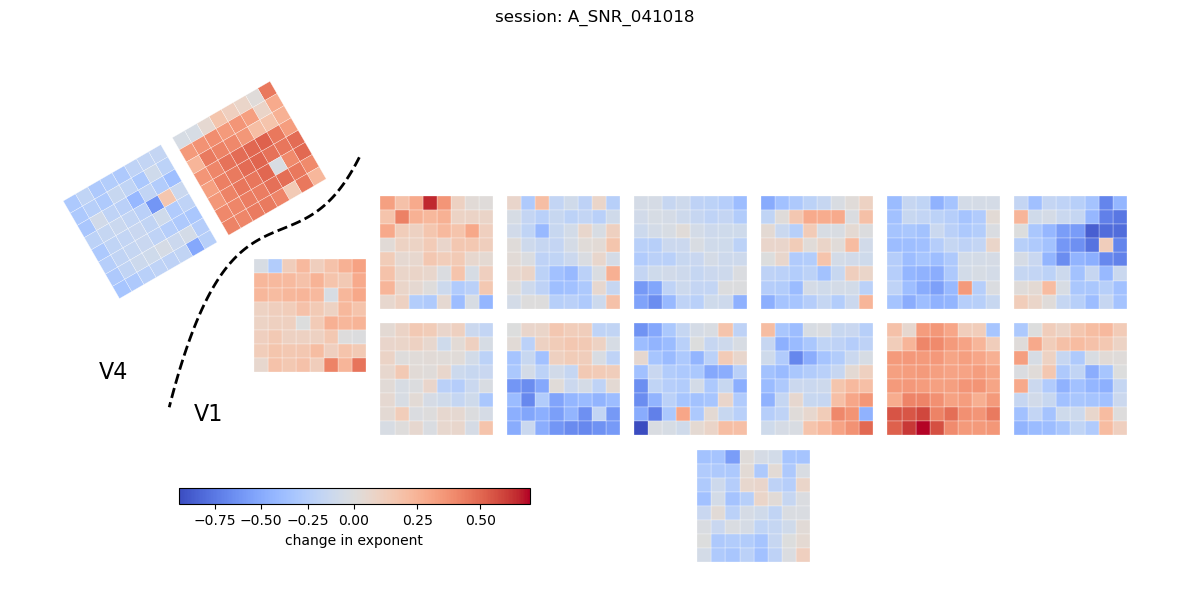

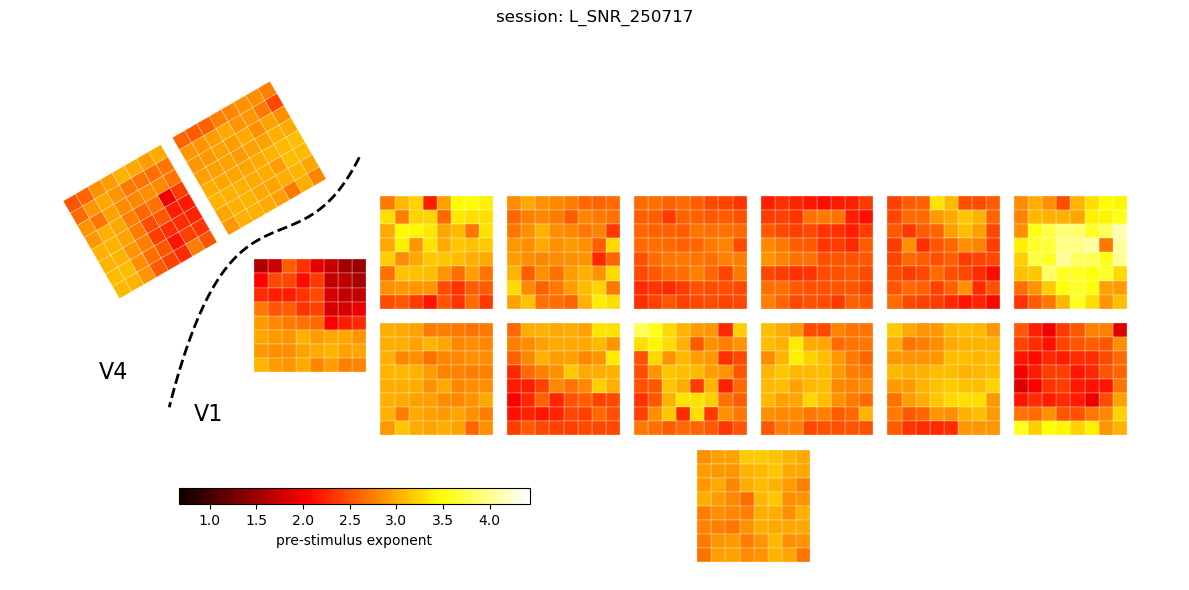

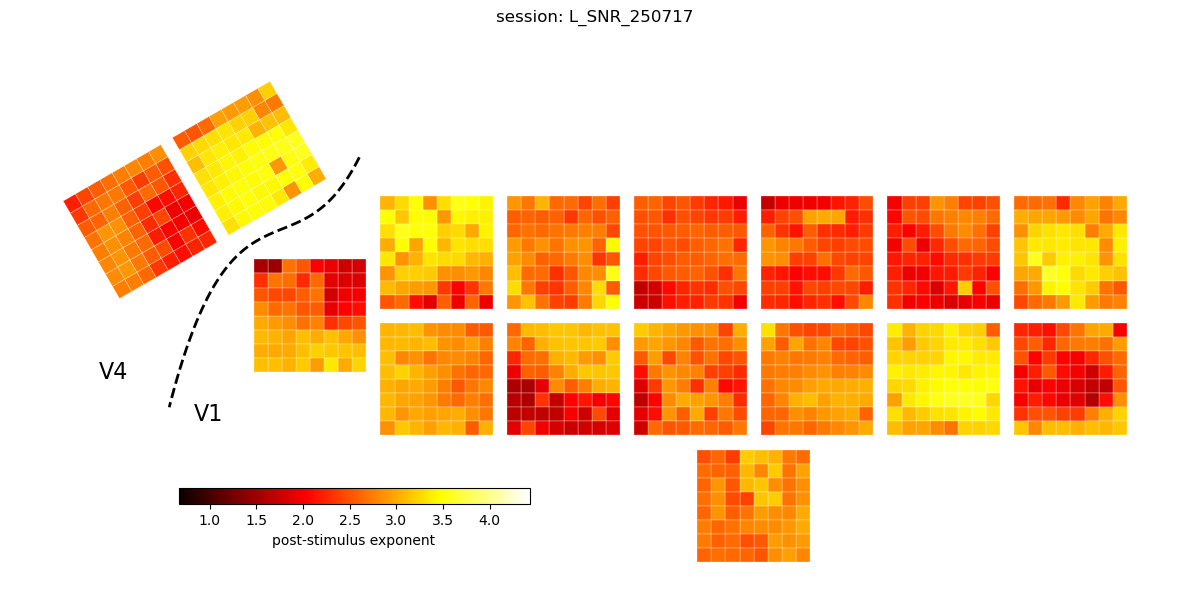

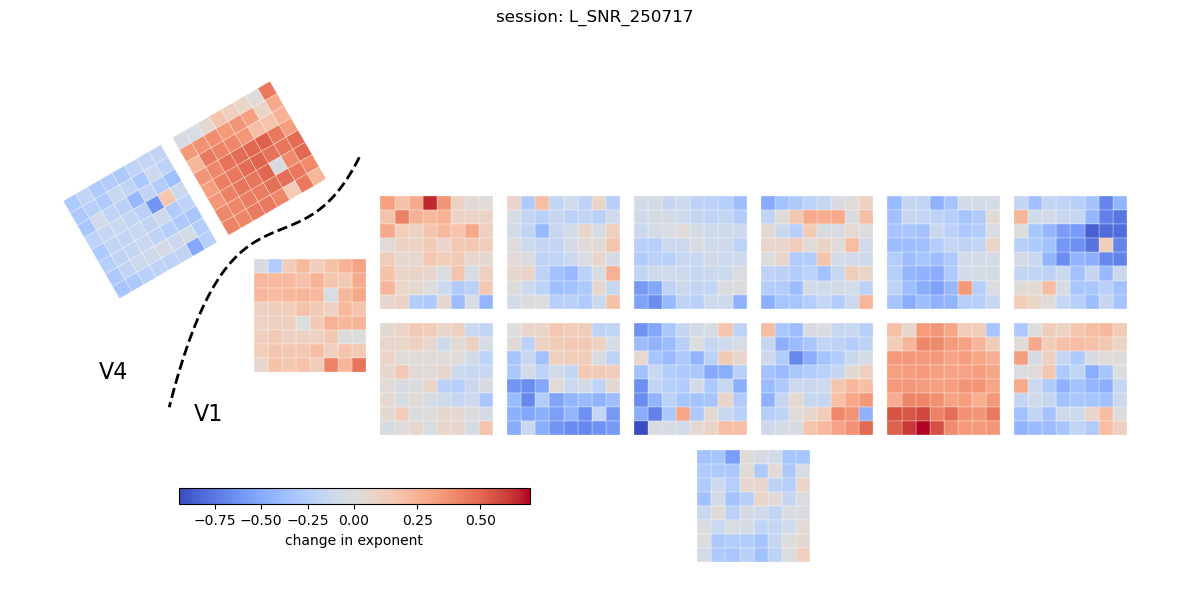

In [9]:
for session in SESSIONS:
    # pre-stimulus
    fig, ax = plot_schematic(df_allsessions['pre_exp'], odml_path, title = f"session: {session}", label = "pre-stimulus exponent", vmin = minlim, vmax = maxlim, fname_out= f"{dir_figs}/{session}_exp_pre.png")

    # post-stimulus
    fig, ax = plot_schematic(df_allsessions['post_exp'], odml_path, title = f"session: {session}", label = "post-stimulus exponent", vmin = minlim, vmax = maxlim, fname_out= f"{dir_figs}/{session}_exp_post.png")

    # change in exponent
    change = df_allsessions['post_exp'] - df_allsessions['pre_exp']
    ch_max = max(change)
    ch_min = min(change)
    fig, ax = plot_schematic(change, odml_path, norm_type = "two_slope", title = f"session: {session}", label = "change in exponent", vmin = ch_min, vmax = ch_max, fname_out= f"{dir_figs}/{session}_exp_change.png")


##### Plot schematic of goodness-of-fit results
3 plots: pre-stimulus r-squared, post-stimulus r-squared, and difference in r-squared

In [12]:
# setting limits for colorbar
lims = np.append(df_allsessions['pre_r2'],df_allsessions['post_r2'])
maxli = max(lims)
minli = min(lims)

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element 

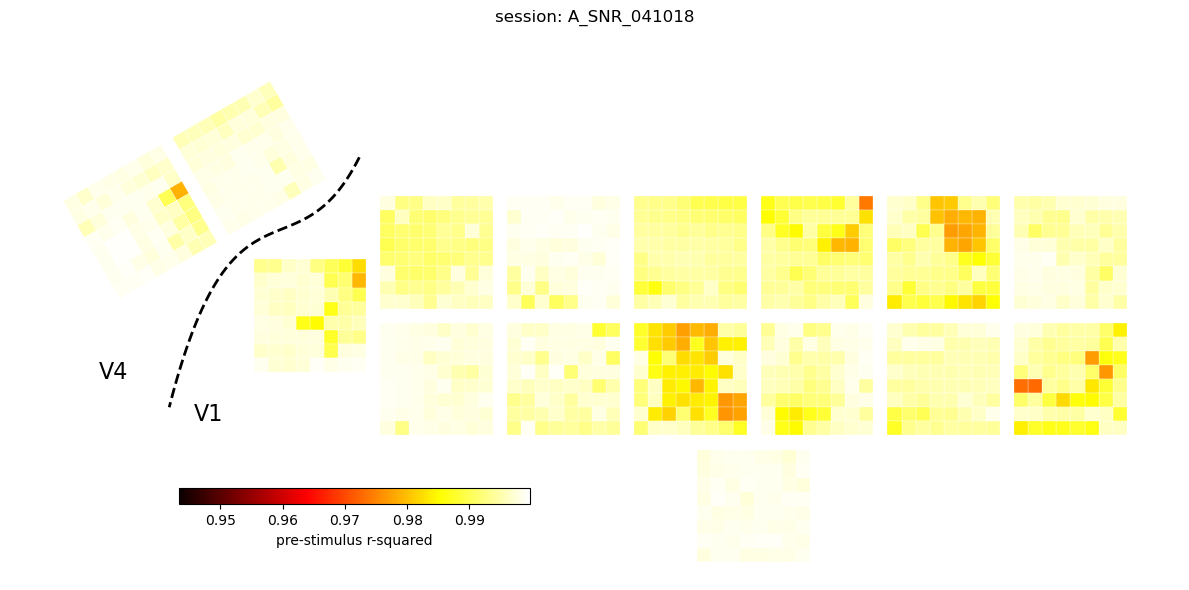

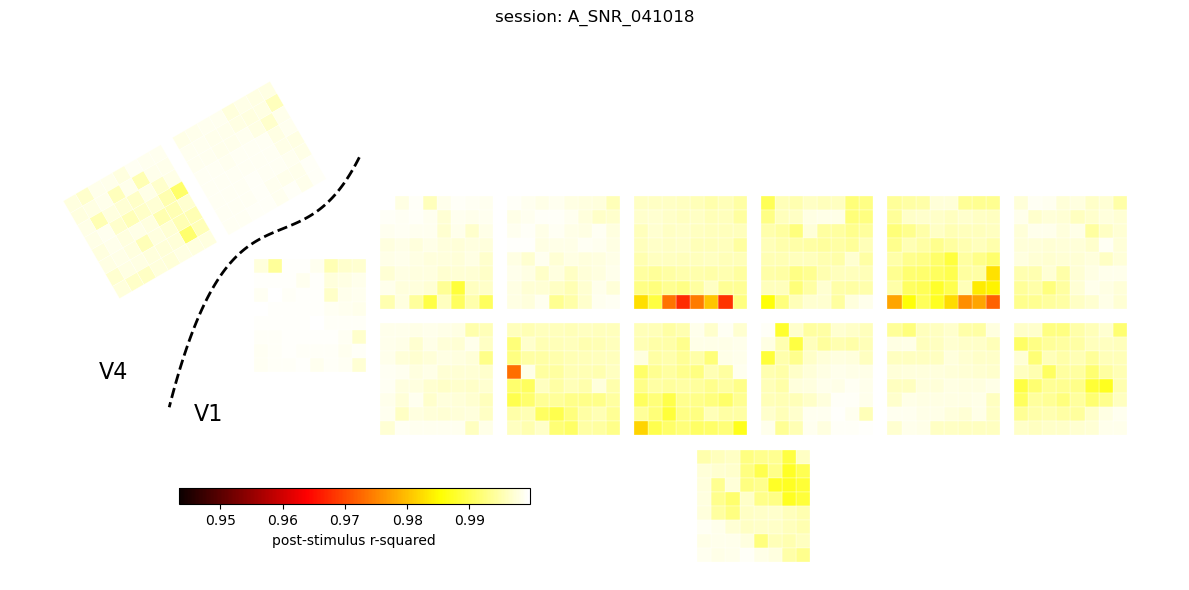

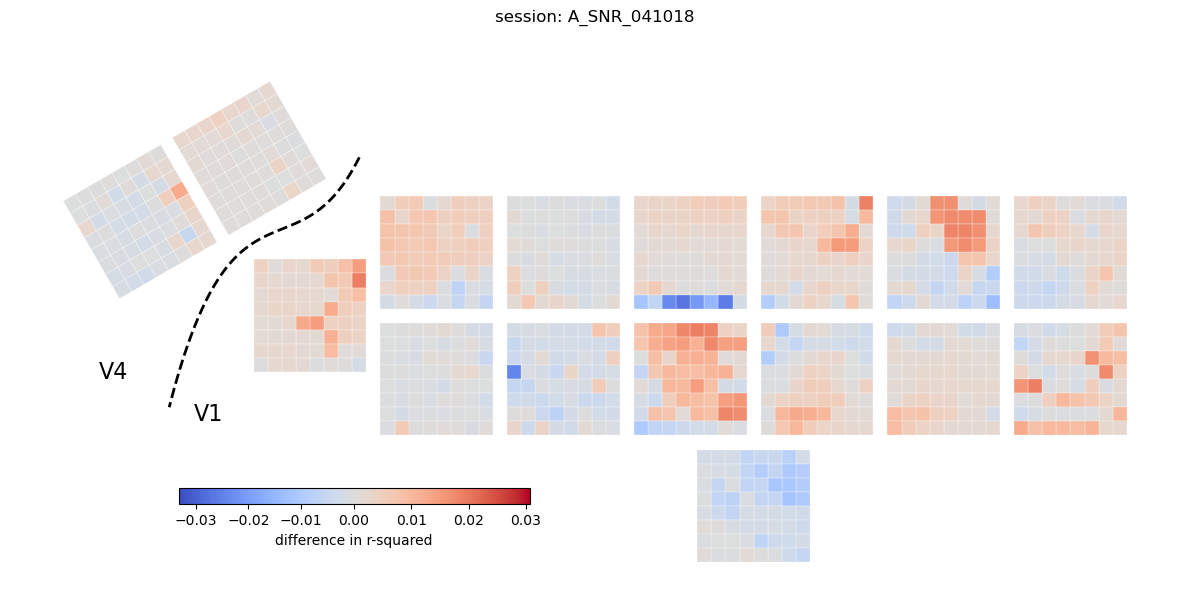

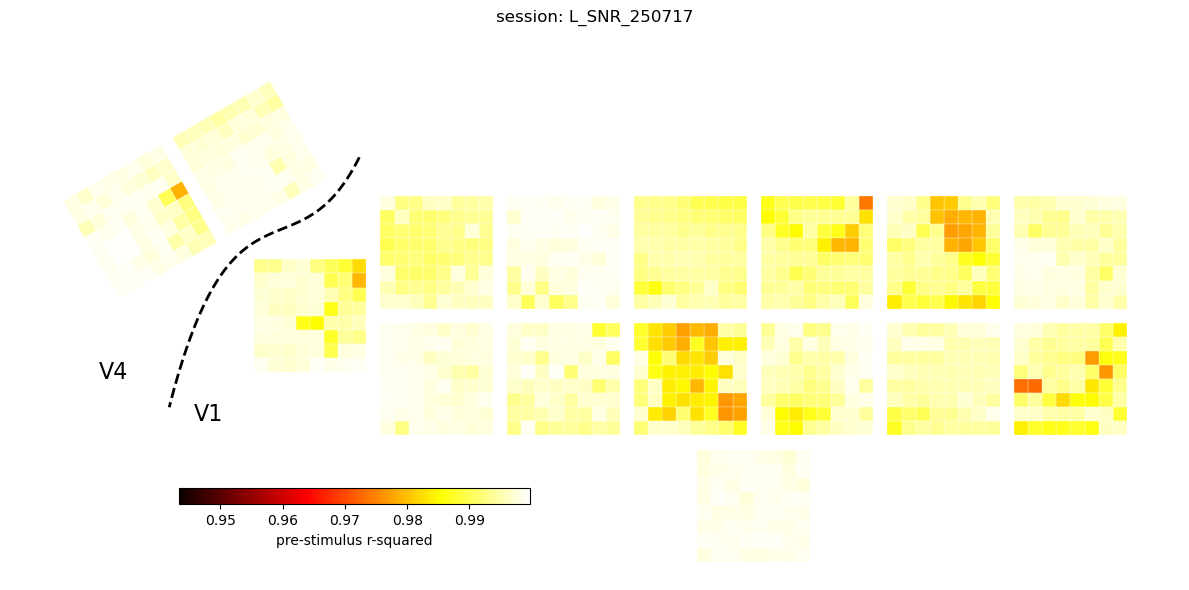

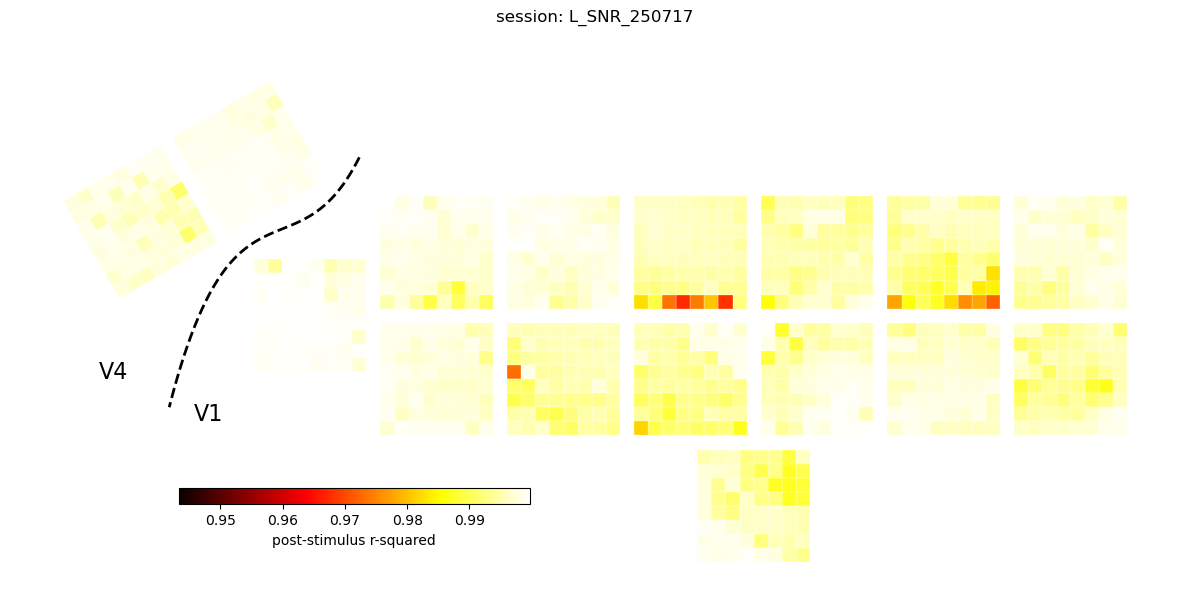

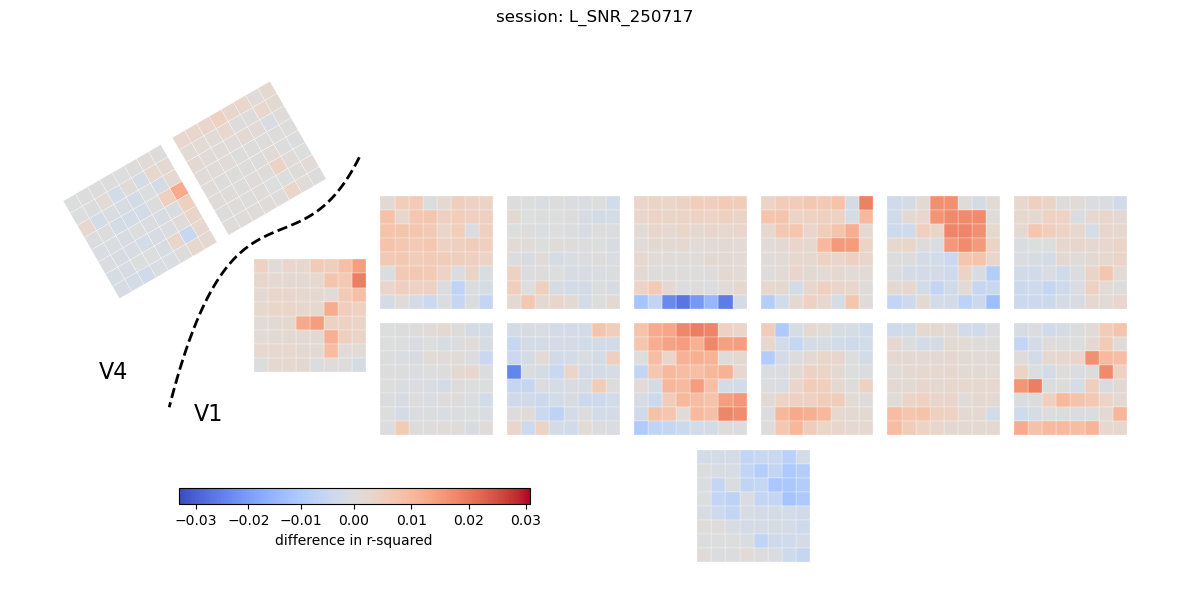

In [13]:
for session in SESSIONS:
    # pre-stimulus
    fig, ax = plot_schematic(df_allsessions['pre_r2'], odml_path, title = f"session: {session}", label = "pre-stimulus r-squared", vmin = minli, vmax = maxli, fname_out= f"{dir_figs}/{session}_r2_pre.png")

    # post-stimulus
    fig, ax = plot_schematic(df_allsessions['post_r2'], odml_path, title = f"session: {session}", label = "post-stimulus r-squared", vmin = minli, vmax = maxli, fname_out= f"{dir_figs}/{session}_r2_post.png")

    # change in exponent
    diff = df_allsessions['post_r2'] - df_allsessions['pre_r2']
    diff_max = max(diff)
    diff_min = min(diff)
    fig, ax = plot_schematic(diff, odml_path, norm_type = "two_slope", title = f"session: {session}", label = "difference in r-squared", vmin = diff_min, vmax = diff_max, fname_out= f"{dir_figs}/{session}_r2_diff.png")
